In [3]:
import transformers
import torch

model_id = "meta-llama/Llama-3.2-3B-Instruct"

pipeline = transformers.pipeline(
    "text-generation", 
    model=model_id, 
    model_kwargs={"torch_dtype": torch.bfloat16}, 
    device="cuda"
)

Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  9.18it/s]
Device set to use cuda


In [4]:
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Is my cat cute?"},
]

In [5]:
import time 

start_time = time.time()
output = pipeline(text_inputs=messages, max_new_tokens=100)
end_time = time.time()

output

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


[{'generated_text': [{'role': 'system',
    'content': 'You are a helpful assistant.'},
   {'role': 'user', 'content': 'Is my cat cute?'},
   {'role': 'assistant',
    'content': "That's a subjective question, but I'd love to try to help you answer it.\n\nCuteness is in the eye of the beholder, and what one person finds adorable, another might not. However, I can try to provide some insights.\n\nCats are often considered cute due to their physical characteristics, such as:\n\n1. Their small size and compact body\n2. Their round face, large eyes, and fluffy ears\n3. Their playful and curious nature\n4. Their soft"}]}]

In [6]:
tokenizer = transformers.AutoTokenizer.from_pretrained(model_id)
generated_text = output[0]["generated_text"]

generated_text_str = str(generated_text) 
generated_tokens = tokenizer(generated_text_str, return_tensors="pt")
num_tokens = generated_tokens["input_ids"].shape[1]

total_time = end_time - start_time
tokens_per_sec = num_tokens / total_time if total_time > 0 else 0

print("Generated text:", generated_text)
print(f"Tokens generated: {num_tokens}")
print(f"Time taken: {total_time:.2f} seconds")
print(f"Tokens per second: {tokens_per_sec:.2f} t/s")


Generated text: [{'role': 'system', 'content': 'You are a helpful assistant.'}, {'role': 'user', 'content': 'Is my cat cute?'}, {'role': 'assistant', 'content': "That's a subjective question, but I'd love to try to help you answer it.\n\nCuteness is in the eye of the beholder, and what one person finds adorable, another might not. However, I can try to provide some insights.\n\nCats are often considered cute due to their physical characteristics, such as:\n\n1. Their small size and compact body\n2. Their round face, large eyes, and fluffy ears\n3. Their playful and curious nature\n4. Their soft"}]
Tokens generated: 153
Time taken: 2.89 seconds
Tokens per second: 52.95 t/s


# Stable Diffusion

Loading pipeline components...:   0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

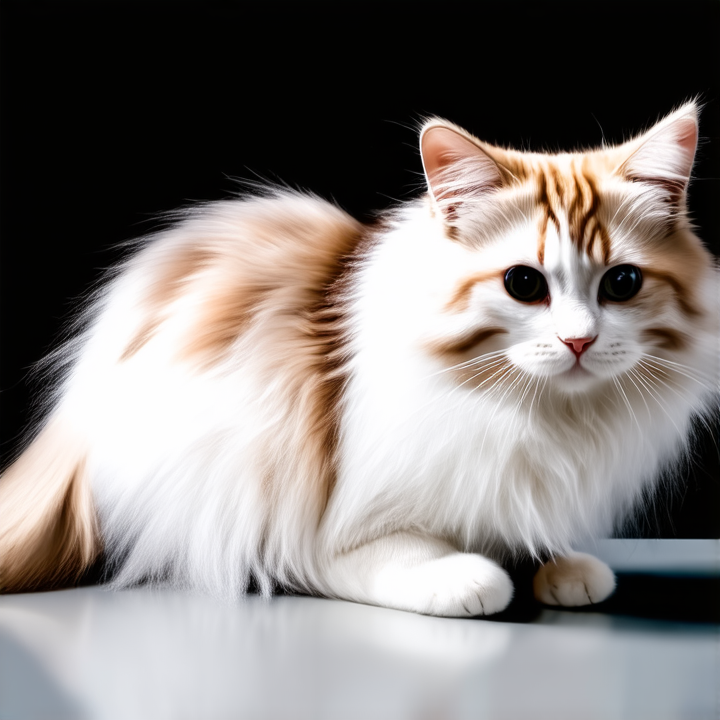

In [2]:
import torch
from diffusers import StableDiffusion3Pipeline

pipe = StableDiffusion3Pipeline.from_pretrained("stabilityai/stable-diffusion-3-medium-diffusers", 
                                                torch_dtype=torch.float16,
                                                text_encoder_3=None,
                                                )
pipe = pipe.to("cuda")
# pipe.enable_attention_slicing()
# pipe.enable_sequential_cpu_offload()

image = pipe(
    "cat, white and brown, long hair, fluffy tail",
    negative_prompt="",
    num_inference_steps=28,
    guidance_scale=7.0,
    width=720,
    height=720
).images[0]
image